In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("Heart_Disease_Prediction.csv")

In [9]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [10]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

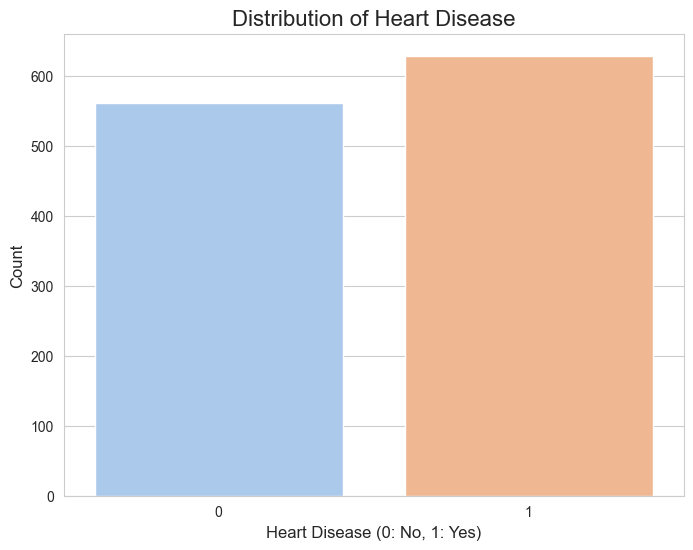

In [11]:
# Set the plot style
sns.set_style('whitegrid')

# Plotting the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Distribution of Heart Disease', fontsize=16)
plt.xlabel('Heart Disease (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [12]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


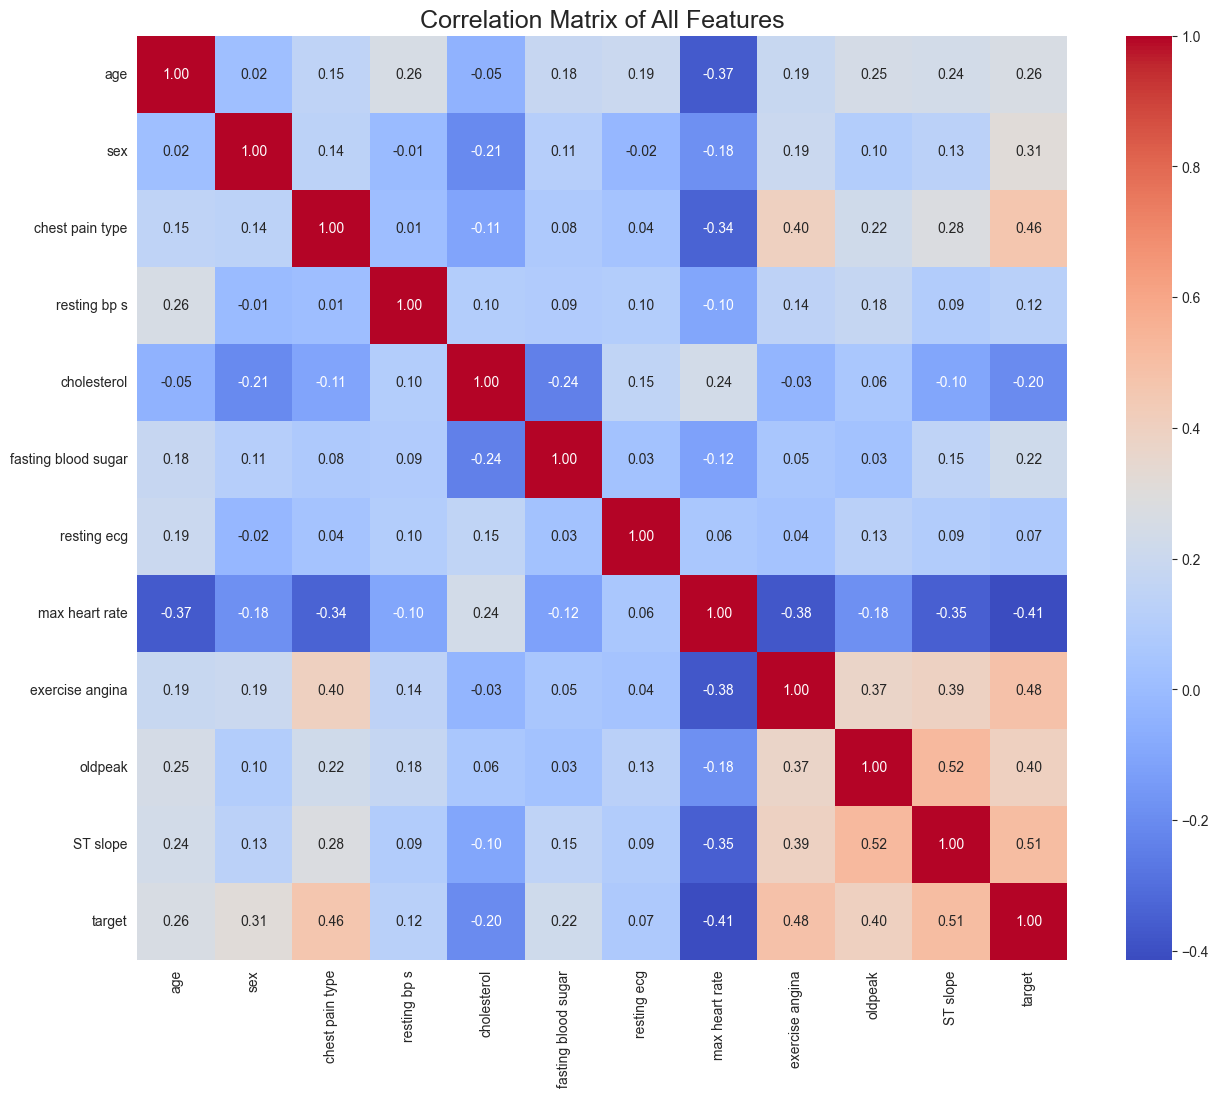

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features', fontsize=18)
plt.show()

In [15]:
x=df.drop('target',axis=1)
y=df['target']

In [16]:
x

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [17]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((833, 11), (357, 11), (833,), (357,))

In [20]:
from sklearn.ensemble import RandomForestClassifier
rand_cla=RandomForestClassifier()

In [21]:
rand_cla.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=rand_cla.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
print("Accuracy Score of this model:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score of this model: 0.9439775910364145
[[161  10]
 [ 10 176]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       171
           1       0.95      0.95      0.95       186

    accuracy                           0.94       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.94      0.94      0.94       357



In [25]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth':[1,2,3,4,5,6,7,10],
    'max_features':['sqrt','log2','auto']}

params_grid

{'n_estimators': [100, 200, 300],
 'min_samples_split': [2, 4],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
 'max_features': ['sqrt', 'log2', 'auto']}

In [26]:
grid=GridSearchCV(estimator=rand_cla,param_grid=params_grid,cv=5,scoring='r2',verbose=3)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=3)

In [27]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.254 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.302 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.326 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.178 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.250 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.254 total time=   0.3s
[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.302 total time=   0.3s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.326 total time=   0.3s
[CV 4/5] 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=3)

In [30]:
y_pred=grid.predict(x_test)

In [31]:
print("Accuracy Score of this Heart_Disease_Pred_model:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score of this Heart_Disease_Pred_model: 0.927170868347339
[[158  13]
 [ 13 173]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       171
           1       0.93      0.93      0.93       186

    accuracy                           0.93       357
   macro avg       0.93      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357

